<a href="https://colab.research.google.com/github/tamnol/DeepLearning-AI/blob/master/convolution_Efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 3
In the videos you looked at how you would improve Fashion MNIST using Convolutions. For your exercise see if you can improve MNIST to 99.8% accuracy or more using only a single convolutional layer and a single MaxPooling 2D. You should stop training once the accuracy goes above this amount. It should happen in less than 20 epochs, so it's ok to hard code the number of epochs for training, but your training must end once it hits the above metric. If it doesn't, then you'll need to redesign your layers.

I've started the code for you -- you need to finish it!

When 99.8% accuracy has been hit, you should print out the string "Reached 99.8% accuracy so cancelling training!"


# CONVOLUTION EFFICIENCY  


## convolution role over image recognition

W0701 19:36:52.082861 139643685287808 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/10
60000/60000 [==============================] - 9s 156us/sample - loss: 0.1424 - acc: 0.9580
Epoch 2/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0482 - acc: 0.9849
Epoch 3/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0302 - acc: 0.9901
Epoch 4/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0205 - acc: 0.9934
Epoch 5/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0137 - acc: 0.9958
Epoch 6/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0099 - acc: 0.9968
Epoch 7/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0073 - acc: 0.9977
Epoch 8/10
59616/60000 [============================>.] - ETA: 0s - loss: 0.0059 - acc: 0.9980
 
 our handwriting training model has reached 99.8% accuracy.Thus, the process stopped.

60000/60000 [==============================] - 5s 91us/sample - loss: 0.0059 - acc: 0.9980
Model: "se

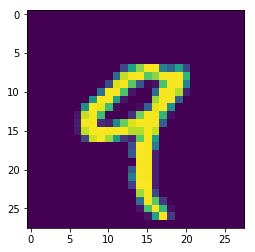

In [0]:
import tensorflow as tf

# YOUR CODE STARTS HERE
import matplotlib.pyplot as plt
import numpy as np

class convWriting(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if( logs.get('acc') > 0.998):
      print('\n \n' f" our handwriting training model has reached { round (logs.get('acc')*100, 2) }% accuracy.Thus, the process stopped." '\n')
      self.model.stop_training = True 
conWriting =  convWriting()
# YOUR CODE ENDS HERE

mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
# YOUR CODE STARTS HERE
training_images= training_images/255.0
plt.imshow(training_images[4])
training_images = training_images.reshape(60000,28, 28, 1)
test_images= test_images/255.0
test_images =test_images.reshape(10000,28, 28, 1)


# YOUR CODE ENDS HERE

model = tf.keras.models.Sequential([
     # YOUR CODE STARTS HERE 

    tf.keras.layers.Conv2D(32,(3,3),activation='relu', input_shape= (28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax') 
    # YOUR CODE ENDS HERE
])

# YOUR CODE STARTS HERE
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10, callbacks=[conWriting])
model.summary()
# YOUR CODE ENDS HERE

